### Code for Obtaining masks from sample `mask_coordinates.csv` points


Currently the file structure is as follows:

KKS_Dataset
├── 27808_1_1
├── 27808_1_1_cropped
├── 27808_1_1_segmentation
├── 27808_1_1_truncated
├── 27808_1_2
├── 27808_1_2_cropped
├── 27808_1_2_segmentation
├── 27808_1_2_segmentation (copy)
├── 27808_1_2_truncated
├── 27808_1_3
├── 27808_1_3_cropped
└── 27808_1_3_truncated


DESCRIPTION
- Each `27808_1_{Dataset_Index}_truncated` contains first ~630 images from `27808_1_{Dataset_Index}` folder: here `Dataset Index` takes in values from 1 2 3 and so on depending on the dataset
- `27808_1_{Dataset_Index}` contains the cropped region of the or the FOV in which the beads actually move, since this is the region where the beads are actually moving 
- `27808_1_{Dataset_Index}_segmentation`  contains the coordinates of the places where segmentation needs to take place or the location of the circles on the binary mask:
    Example consider the file `27808_1_1.csv`
        KKS_Dataset/27808_1_1_segmentation
        └── 27808_1_1.csv
- Description of each `.csv` file is given below



In [48]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd



In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'2.13.0'

In [51]:
# Show if gpu available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Define the input parameters

In [75]:
# Define the input parameters( image size, parent directory, target_directory
dirnum = 2
parent_dir = f'/media/vinayak-amd/Backup/Home/KKS_Dataset/27808_1_{dirnum}_cropped'

image_dir = os.path.join(parent_dir, 'images')
mask_dir = os.path.join(parent_dir, 'masks')
segmentation_file = os.path.join(parent_dir, 'segmentation.csv')

Number of images: 631


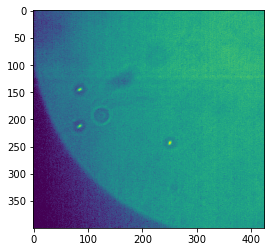

In [76]:
# Read a sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# List only .tiff files in a directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.tiff')]

print(f'Number of images: {len(image_files)}')


# Show a sample image and defin image_width and image_height

img = mpimg.imread(os.path.join(image_dir, image_files[0]))

plt.imshow(img)
image_width = img.shape[1]
image_height = img.shape[0]
max_value = len(image_files)

In [77]:
max_value

631

In [78]:
img.shape

(400, 425)

#### Read the file which contains the coordinates for the segmentation

In [79]:
# Read the segmentation file
import pandas as pd
pd.read_csv(segmentation_file)
# Convert second column to integer( this displays the image number in the dataset)
df = pd.read_csv(segmentation_file)
df.iloc[:,1] = df.iloc[:,1].astype(int)

### Code for the cropping

In [80]:
# Specify the radius of the circles

x, y = np.meshgrid(np.arange(0, image_width), np.arange(0, image_height))
radius = 5
#x = image_width - x +1
#y = image_height - y +1
# Create a blank image
image = np.zeros((image_height, image_width), dtype=np.uint8)
import tifffile as tiff



In [81]:
x

array([[  0,   1,   2, ..., 422, 423, 424],
       [  0,   1,   2, ..., 422, 423, 424],
       [  0,   1,   2, ..., 422, 423, 424],
       ...,
       [  0,   1,   2, ..., 422, 423, 424],
       [  0,   1,   2, ..., 422, 423, 424],
       [  0,   1,   2, ..., 422, 423, 424]])

In [82]:
# Specify the value to match in column 0
for i in range(0, max_value):
    value_to_match = i
    # Slice the dataframe based on the condition
    sliced_df = df[df.iloc[:, 1] == value_to_match]
    print(sliced_df)
    for index, row in sliced_df.iterrows():
        cy = row['axis-1']
        cx = row['axis-2']
    
        # Calculate the distance from each point in the grid to the center of the circle
        distance = np.sqrt((x - cx)**2 + (y - cy)**2)
    
        # Set the pixels within the radius of the circle to red
        image[distance <= radius] = 255

    tiff.imwrite(os.path.join(mask_dir, "{:05d}_mask.tiff".format(i)), image)
    image = np.zeros((image_height, image_width), dtype=np.uint8)

   index  axis-0      axis-1      axis-2
0    0.0     0.0  214.839988   82.963640
1    1.0     0.0  143.554164   85.670697
2    2.0     0.0  190.476479  126.276545
3    3.0     0.0  244.617610  249.898796
4    4.0     0.0   79.487159  239.972922
   index  axis-0      axis-1      axis-2
5    5.0     1.0  148.968278   85.670697
6    6.0     1.0  213.035284   84.768344
7    7.0     1.0  188.671774  126.276545
8    8.0     1.0  247.324667  248.996444
9    9.0     1.0   81.291863  241.777626
    index  axis-0      axis-1      axis-2
10   10.0     2.0  147.163573   84.768344
11   11.0     2.0  217.547044   82.963640
12   12.0     2.0  189.574126  126.276545
13   13.0     2.0   77.682454  241.777626
14   14.0     2.0  241.910554  251.703500
    index  axis-0      axis-1      axis-2
15   15.0     3.0  145.358869   82.963640
16   16.0     3.0  213.135203   84.668425
17   17.0     3.0  190.476479  126.276545
18   18.0     3.0  245.519963  248.094092
19   19.0     3.0   77.682454  239.070570
    

In [30]:
cx

278.66115466005374

In [52]:
image_width

623

In [53]:
np.max(x)

622

In [32]:
image = np.zeros(image.shape, dtype=np.uint8)   

In [45]:
sliced_df = df[df.iloc[:, 1] == 1]

In [46]:
sliced_df

,index,axis-0,axis-1,axis-2
3,3.0,1.0,474.408696,117.993503
4,4.0,1.0,234.690506,278.147839
5,5.0,1.0,372.258975,401.343483
2345,2345.0,1.0,223.475411,462.308066


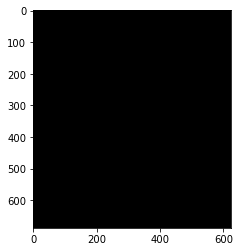

In [34]:
plt.imshow(image, cmap = 'gray')